In [1]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_optimal_500.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)
data.iloc[:36,:]


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,optimal_policy,optimal_outcome_policy
0,2758.583786,2928.739839,2710.556882,66,4066.350544,88,3504.939130
1,3080.634350,3513.963668,2530.810135,66,4449.930195,88,3501.801837
2,3849.241803,3795.950639,3368.870548,29,4348.424224,36,4060.950011
3,3226.087554,3358.558738,2764.454110,29,4261.068828,25,3220.646968
4,3447.789650,3351.477990,3180.469780,29,4424.626732,97,3583.248661
...,...,...,...,...,...,...,...
31,3535.044982,3587.224325,2995.819084,97,4348.782584,29,3584.167268
32,3554.160724,3780.396076,2900.268488,97,4290.645604,29,3770.942254
33,3632.744453,4093.267363,3236.381013,29,4413.977349,29,3583.368032
34,3135.134179,3521.159154,2987.210670,97,4019.963550,29,3522.677052


In [2]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'eps_greedy_policy', 'optimal_policy']:
        data[f'regret_{column}'] = data['optimal_outcome_actions'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,optimal_policy,optimal_outcome_policy,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,regret_optimal_outcome_policy,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction,accumulative_regret_optimal_outcome_policy
0,2758.583786,2928.739839,2710.556882,66,4066.350544,88,3504.939130,1307.766758,1137.610706,1355.793663,561.411414,1307.766758,1137.610706,1355.793663,561.411414
1,3080.634350,3513.963668,2530.810135,66,4449.930195,88,3501.801837,1369.295845,935.966528,1919.120060,948.128358,2677.062603,2073.577234,3274.913723,1509.539773
2,3849.241803,3795.950639,3368.870548,29,4348.424224,36,4060.950011,499.182421,552.473586,979.553676,287.474214,3176.245025,2626.050819,4254.467399,1797.013986
3,3226.087554,3358.558738,2764.454110,29,4261.068828,25,3220.646968,1034.981273,902.510090,1496.614718,1040.421860,4211.226298,3528.560910,5751.082117,2837.435846
4,3447.789650,3351.477990,3180.469780,29,4424.626732,97,3583.248661,976.837082,1073.148741,1244.156952,841.378071,5188.063380,4601.709651,6995.239069,3678.813917


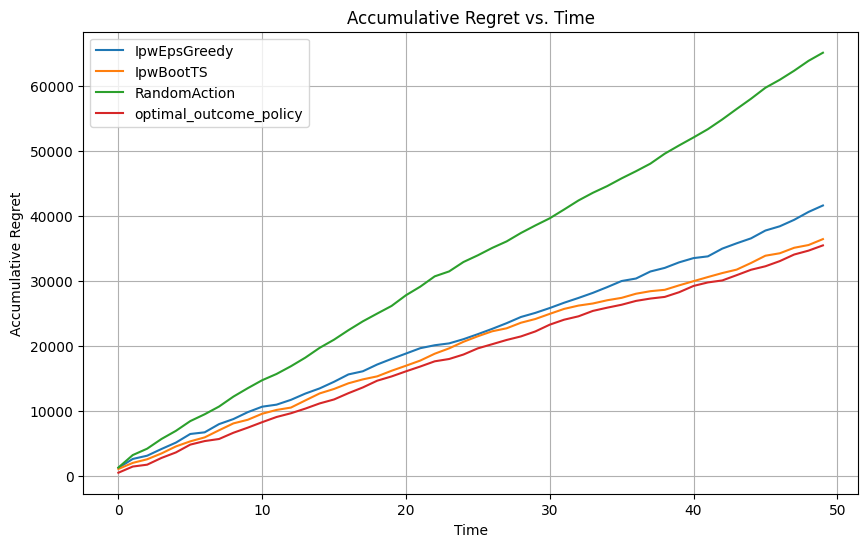

In [3]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret vs. Time')
ax.legend()

plt.grid(True)
plt.show()
